At first,let's import the necessary libraries for EDA.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tkinter import filedialog # this enables to find the filepath through browsing the pc
path = filedialog.askopenfilename(initialdir='/') 
print(f"Here is the filepath to copy & paste wherver u like: \n {path} ")                                                                   

Here is the filepath to copy & paste wherver u like: 
 C:/Users/User/pythonProject/datacamp_EDA.xlsx 


I am thankful to Naim Snigdho for sharing this technique

In [3]:
# now let's craete a dataframe from excel dataset
df = pd.read_excel("C:/Users/User/pythonProject/datacamp_EDA.xlsx ")

In [4]:
# Let's see the first 8 rows
df.head(8)

,FirstName,LastName,Username,Teams,JoinedGroup,LeftGroup,CourseId,CourseName,Technology,StartedCourse,FinishedCourse,LastVisitedCourse,CompletedCourseExercises,CourseCompletionRate,CourseStatus,TotalCourseXPEarned,TotalCourseXPAvailable,XPScore
0,ABDUL,ABID TANBIR,AbdulAbidTanbir,NaN,2023-02-03,2023-05-31,24098,Cleaning Data in R,R,2023-03-26,NaT,2023-05-26,14,0.32,In Progress,1200,3700,0.32
1,ABDUL,ABID TANBIR,AbdulAbidTanbir,NaN,2023-02-03,2023-05-31,24852,Introduction to Statistics in R,R,2023-02-04,2023-02-17,2023-02-17,54,1.00,Completed,4065,4250,0.96
2,ABDUL,ABID TANBIR,AbdulAbidTanbir,NaN,2023-02-03,2023-05-31,27336,Data Communication Concepts,Theory,2023-02-25,NaT,2023-03-20,26,0.52,In Progress,2000,3750,0.53
3,Abidur,Rahman,abidkhan73992,NaN,2023-02-03,2023-05-31,58,Introduction to R,R,2023-02-03,NaT,2023-02-05,0,0.00,In Progress,0,6200,1.00
4,Abidur,Rahman,abidkhan73992,NaN,2023-02-03,2023-05-31,735,Introduction to Python,Python,2023-02-03,2023-02-14,2023-02-15,57,1.00,Completed,4700,4700,1.00
5,Abidur,Rahman,abidkhan73992,NaN,2023-02-03,2023-05-31,799,Intermediate Python,Python,2023-02-14,NaT,2023-03-09,59,0.68,In Progress,4800,7400,0.65
6,Abrar,Bin khaiyum,abrarbin34,Python Learner's,2023-02-03,NaT,19854,Data Manipulation with dplyr,R,2023-03-29,2023-04-14,2023-04-14,46,1.00,Completed,2246,3850,0.58
7,Abrar,Bin khaiyum,abrarbin34,Python Learner's,2023-02-03,NaT,31950,Introduction to ChatGPT,Theory,2023-03-26,NaT,2023-03-26,0,0.00,In Progress,0,1700,1.00


In [5]:
# let's have a quick information summary
print(df.info(),'\n',df.shape) #df.info() is enough actually

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   FirstName                 367 non-null    object        
 1   LastName                  367 non-null    object        
 2   Username                  370 non-null    object        
 3   Teams                     259 non-null    object        
 4   JoinedGroup               370 non-null    datetime64[ns]
 5   LeftGroup                 104 non-null    datetime64[ns]
 6   CourseId                  370 non-null    int64         
 7   CourseName                370 non-null    object        
 8   Technology                370 non-null    object        
 9   StartedCourse             370 non-null    datetime64[ns]
 10  FinishedCourse            166 non-null    datetime64[ns]
 11  LastVisitedCourse         370 non-null    datetime64[ns]
 12  CompletedCourseExercis

In [6]:
# how many missing values per column or variable
df.isna().sum()

FirstName                     3
LastName                      3
Username                      0
Teams                       111
JoinedGroup                   0
LeftGroup                   266
CourseId                      0
CourseName                    0
Technology                    0
StartedCourse                 0
FinishedCourse              204
LastVisitedCourse             0
CompletedCourseExercises      0
CourseCompletionRate          0
CourseStatus                  0
TotalCourseXPEarned           0
TotalCourseXPAvailable        0
XPScore                       0
dtype: int64

It looks like our data is already cleaned (almost).The Dataset is mostly about the progress of a group of DataCamp learners.It is obvious that not everyone will finish every course resulting in having missing datetime for FinishedCourse column.Similarly,not everyone will leave the group for DataCamp.Missing values in Teams suggests that not everyone is eager to give himself a label or maybe they can't decide which track he should follow. 

After close observation,we have found that there are actually 5 missing values in each of FirstName and lastName.The extra two not recognized by isna() method are basically a bunch  of question marks like ??

In [7]:


# Filter rows where at least one question mark or hyphen is present in the first two columns
filtered_df = df[(df['FirstName'].str.contains('[?\-]')) | (df['LastName'].str.contains('[?\-]'))]

# Print the filtered DataFrame
print(filtered_df)


         FirstName LastName              Username Teams JoinedGroup  \
244  ??????? ?????      ???  sabbirahmedshuvo1997   NaN  2023-02-18   
245  ??????? ?????      ???  sabbirahmedshuvo1997   NaN  2023-02-18   

     LeftGroup  CourseId         CourseName Technology StartedCourse  \
244 2023-03-27       672     Intermediate R          R    2023-02-23   
245 2023-03-27        58  Introduction to R          R    2023-02-18   

    FinishedCourse LastVisitedCourse  CompletedCourseExercises  \
244            NaT        2023-02-23                         4   
245            NaT        2023-02-18                        31   

     CourseCompletionRate CourseStatus  TotalCourseXPEarned  \
244                  0.05  In Progress                  350   
245                  0.50  In Progress                 2970   

     TotalCourseXPAvailable  XPScore  
244                    6950     0.05  
245                    6200     0.48  


In [8]:
# Replace entries containing question marks or whitespace with NaN
df.replace([r'\?'], pd.NA, regex=True, inplace=True)

# Count the number of missing values per column
missing_value_counts = df.isna().sum()

print(missing_value_counts)

FirstName                     5
LastName                      5
Username                      0
Teams                       111
JoinedGroup                   0
LeftGroup                   266
CourseId                      0
CourseName                    0
Technology                    0
StartedCourse                 0
FinishedCourse              204
LastVisitedCourse             0
CompletedCourseExercises      0
CourseCompletionRate          0
CourseStatus                  0
TotalCourseXPEarned           0
TotalCourseXPAvailable        0
XPScore                       0
dtype: int64


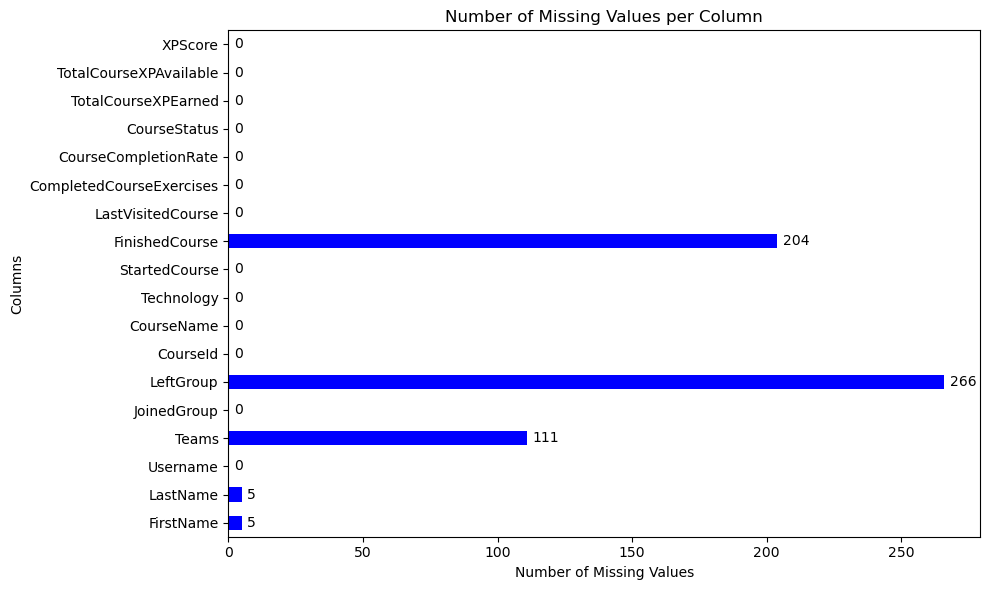

In [9]:
# Create a horizontal bar plot for the number of missing values per column
plt.figure(figsize=(10, 6))
ax = missing_value_counts.plot(kind='barh', color='blue')

# Add the count of missing values at the right edge of each bar
for index, value in enumerate(missing_value_counts):
    ax.text(value + 2, index, str(value), va='center', color='black')

plt.xlabel("Number of Missing Values")
plt.ylabel("Columns")
plt.title("Number of Missing Values per Column")
plt.tight_layout()
plt.show()

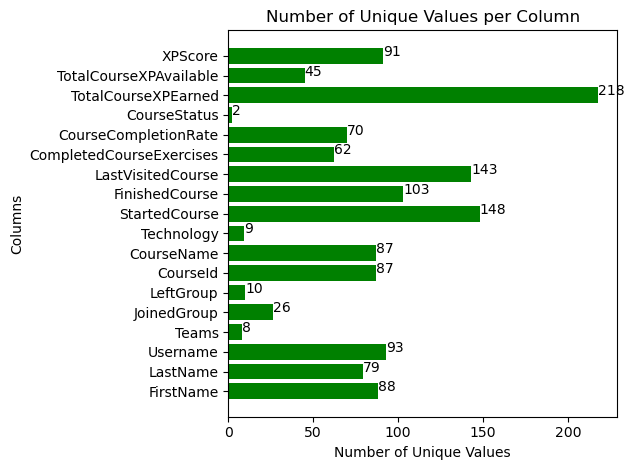

In [10]:
# Calculate the number of unique values per column
unique_value_counts = df.nunique()

# Create a horizontal bar plot
plt.barh(unique_value_counts.index, unique_value_counts.values, color='green')
for index, value in enumerate(unique_value_counts.values):
    plt.text(value, index, str(value))  # Display the count at the right edge
plt.xlabel('Number of Unique Values')
plt.ylabel('Columns')
plt.title('Number of Unique Values per Column')
plt.tight_layout()
plt.show()

So,there is information about 93 individual user,87 unique courses;9 technologies of data science are used,93 unique XPScore and 70 unique CourseCompletionRate.It would not be so hard to rank all 93 users based on their XPScore and CourseCompletionRate.

Examining the dataset,it is found that XPScore=TotalCourseXPEarned/TotalCourseXPAvailable.So XPScore is enough for our calculation.But TotalCourseXPAvailable would be useful for ranking the courses.

In [11]:
# Drop the 'TotalCourseXPEarned' column from the DataFrame
df.drop('TotalCourseXPEarned', axis=1, inplace=True)
df.columns

Index(['FirstName', 'LastName', 'Username', 'Teams', 'JoinedGroup',
       'LeftGroup', 'CourseId', 'CourseName', 'Technology', 'StartedCourse',
       'FinishedCourse', 'LastVisitedCourse', 'CompletedCourseExercises',
       'CourseCompletionRate', 'CourseStatus', 'TotalCourseXPAvailable',
       'XPScore'],
      dtype='object')

We can also create some new columns like FullName,CompletedInDays,TotalExercisesAvailable

In [12]:
# Create 'FullName' column by combining 'FirstName' and 'LastName'
df['FullName'] = df['FirstName'] + ' ' + df['LastName']

# Convert 'FinishedCourse' and 'StartedCourse' to datetime if not already
df['FinishedCourse'] = pd.to_datetime(df['FinishedCourse'])
df['StartedCourse'] = pd.to_datetime(df['StartedCourse'])

# Create 'CompletedInDays' column by calculating the difference in days
df['CompletedInDays'] = (df['FinishedCourse'] - df['StartedCourse']).dt.days

# Calculate 'TotalExercisesAvailable' based on completion rate and exercises
def calculate_total_exercises(row):
    if row['CourseCompletionRate'] == 0:
        return pd.NA
    elif row['CourseCompletionRate'] == 1:
        return row['CompletedCourseExercises']
    else:
        return round(row['CompletedCourseExercises'] / row['CourseCompletionRate'])

df['TotalExercisesAvailable'] = df.apply(calculate_total_exercises, axis=1)

# Display the modified DataFrame
print(df)


           FirstName     LastName         Username             Teams  \
0              ABDUL  ABID TANBIR  AbdulAbidTanbir               NaN   
1              ABDUL  ABID TANBIR  AbdulAbidTanbir               NaN   
2              ABDUL  ABID TANBIR  AbdulAbidTanbir               NaN   
3            Abidur       Rahman     abidkhan73992               NaN   
4            Abidur       Rahman     abidkhan73992               NaN   
..               ...          ...              ...               ...   
365         Towhidul  Alam Ishraq  towhidulalam645  Python Learner's   
366           Arafat    Bin Faruk        ucchash20               NaN   
367           Arafat    Bin Faruk        ucchash20               NaN   
368              NaN          NaN   ummemuntaha123               NaN   
369  Wahedul Mustafa      Shaheen     wshaheenstat               NaN   

    JoinedGroup  LeftGroup  CourseId                              CourseName  \
0    2023-02-03 2023-05-31     24098                   

<AxesSubplot:>

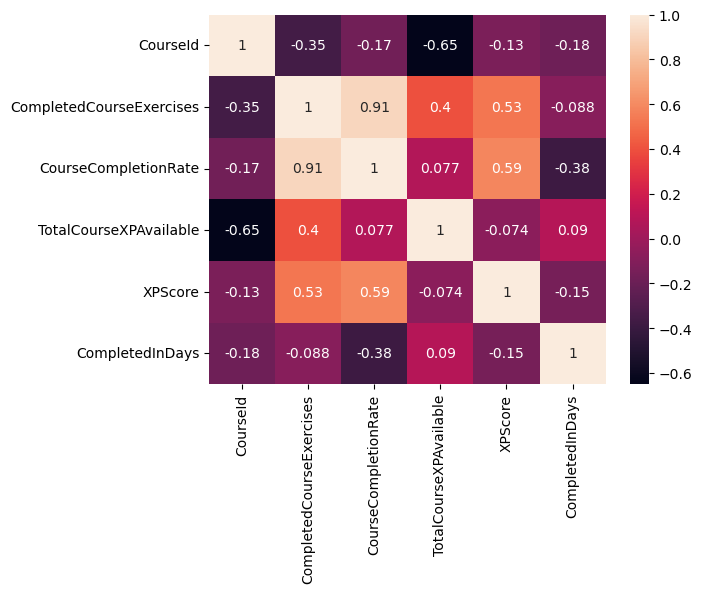

In [13]:
sns.heatmap(df.corr(),annot=True) #finding pairwise correlation between every numeric variable(ignore courseId)

The Pearson's Correlation Coefficient,r between CourseCompletionRate   and  CompletedCourseExercises is 0.91 .Actually it should have been 1(inch perfect positive correlation as the more exercise completed means the more completion rate) but due to the negative marking system in datacamp due to taking hints or asking to show the answer by the user.

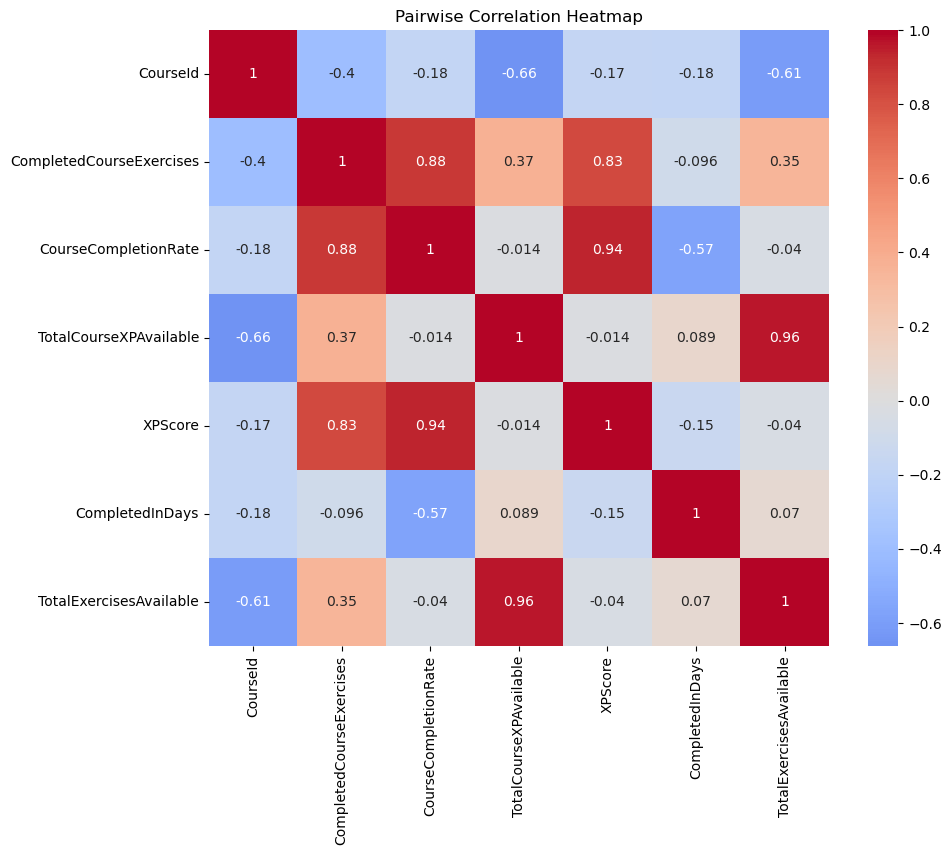

In [14]:

# Subsetting the DataFrame for non-null rows in 'TotalExercisesAvailable'
subset_df = df.copy().dropna(subset=['TotalExercisesAvailable'])

# Convert 'TotalExercisesAvailable' to numeric, replacing non-numeric values with NaN
subset_df['TotalExercisesAvailable'] = pd.to_numeric(subset_df['TotalExercisesAvailable'], errors='coerce')

# Creating a heatmap for pairwise correlation
corr_matrix = subset_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Pairwise Correlation Heatmap")
plt.show()


So,Total Exercise available and Total XP avaialable for a  course correlates perfect positively.Although correlation doesn't imply causation,here we can sesne that with greater xp,comes greater exercises.

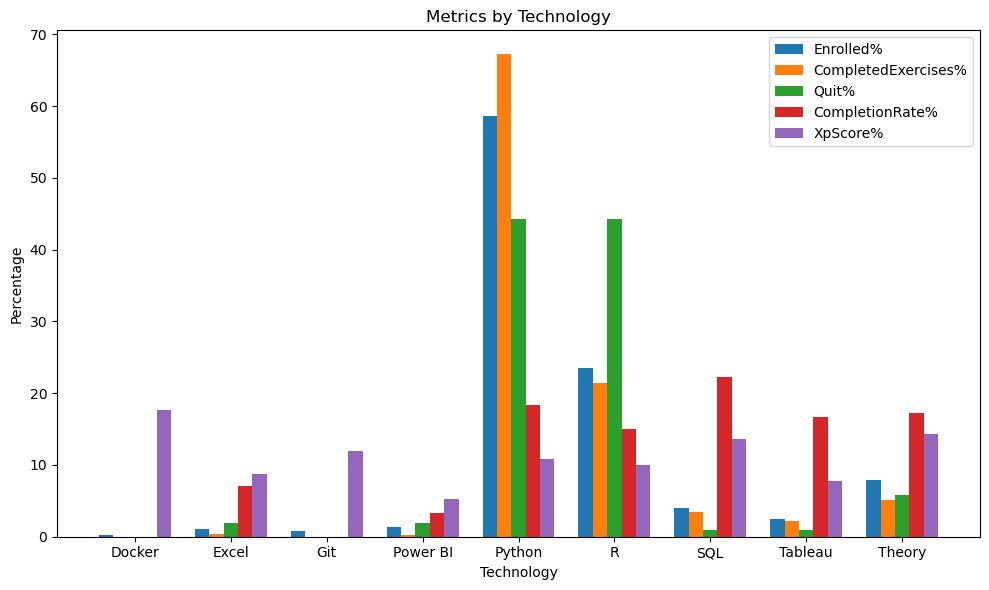

In [15]:


# Calculate counts and percentages for each metric by technology
metrics = ['Enrolled', 'CompletedExercises', 'Quit', 'CompletionRate', 'XpScore']
percentage_metrics = ['Enrolled%', 'CompletedExercises%', 'Quit%', 'CompletionRate%', 'XpScore%']

agg_functions = {
    'Username': 'count',
    'CompletedCourseExercises': 'sum',
    'LeftGroup': 'count',
    'CourseCompletionRate': 'mean',
    'XPScore': 'mean'
}

agg_df = df.groupby('Technology').agg(agg_functions)
agg_df.columns = metrics

for metric, percentage_metric in zip(metrics, percentage_metrics):
    agg_df[percentage_metric] = (agg_df[metric] / agg_df[metric].sum()) * 100

# Create a grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.15
bar_positions = range(len(agg_df))

for i, metric in enumerate(percentage_metrics):
    ax.bar([pos + i * bar_width for pos in bar_positions], agg_df[metric], width=bar_width, label=metric)

ax.set_xticks([pos + 2 * bar_width for pos in bar_positions])
ax.set_xticklabels(agg_df.index)
ax.set_xlabel('Technology')
ax.set_ylabel('Percentage')
ax.set_title('Metrics by Technology')
ax.legend()

plt.tight_layout()
plt.show()


In [16]:

# Calculate counts and percentages for each metric by technology
metrics = ['Enrolled', 'Completed', 'Quit', 'CompletionRate', 'XpScore']
percentage_metrics = ['Enrolled%', 'Completed%', 'Quit%', 'CompletionRate%', 'XpScore%']

agg_functions = {
    'Username': 'count',
    'CompletedCourseExercises': 'sum',
    'LeftGroup': 'count',
    'CourseCompletionRate': 'mean',
    'XPScore': 'mean'
}

agg_df = df.groupby('Technology').agg(agg_functions)
agg_df.columns = metrics

for metric, percentage_metric in zip(metrics, percentage_metrics):
    agg_df[percentage_metric] = (agg_df[metric] / agg_df[metric].sum()) * 100

# Display the DataFrame with percentages
print(agg_df[percentage_metrics])


            Enrolled%  Completed%      Quit%  CompletionRate%   XpScore%
Technology                                                              
Docker       0.270270    0.000000   0.000000         0.000000  17.680482
Excel        1.081081    0.385744   1.923077         7.103862   8.707637
Git          0.810811    0.000000   0.000000         0.000000  11.963793
Power BI     1.351351    0.184486   1.923077         3.350032   5.233423
Python      58.648649   67.194969  44.230769        18.309114  10.832351
R           23.513514   21.400419  44.230769        14.979565   9.957973
SQL          4.054054    3.454927   0.961538        22.313604  13.578610
Tableau      2.432432    2.213836   0.961538        16.750158   7.779412
Theory       7.837838    5.165618   5.769231        17.193666  14.266320


Interpretation  :(
    

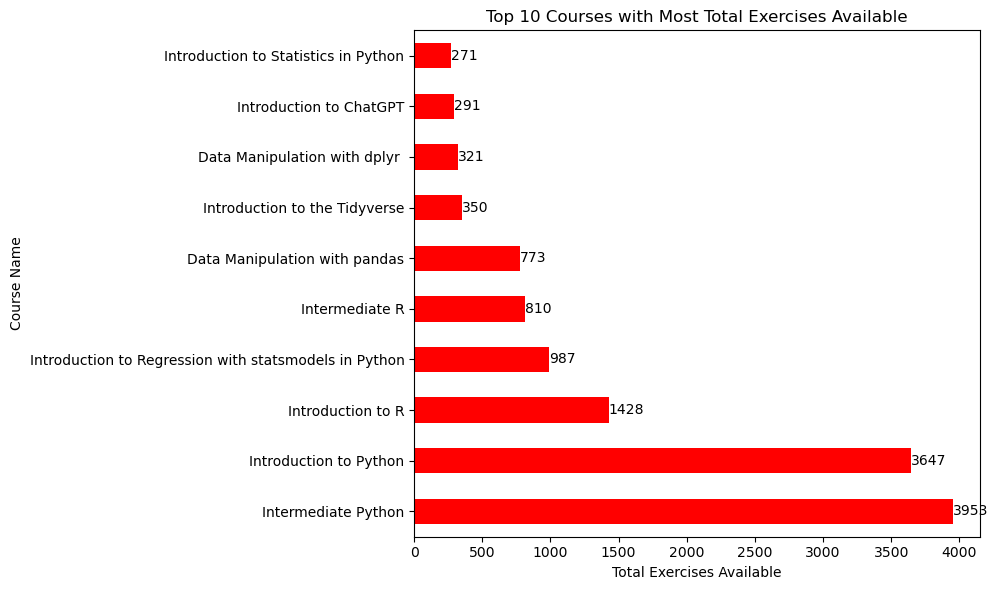

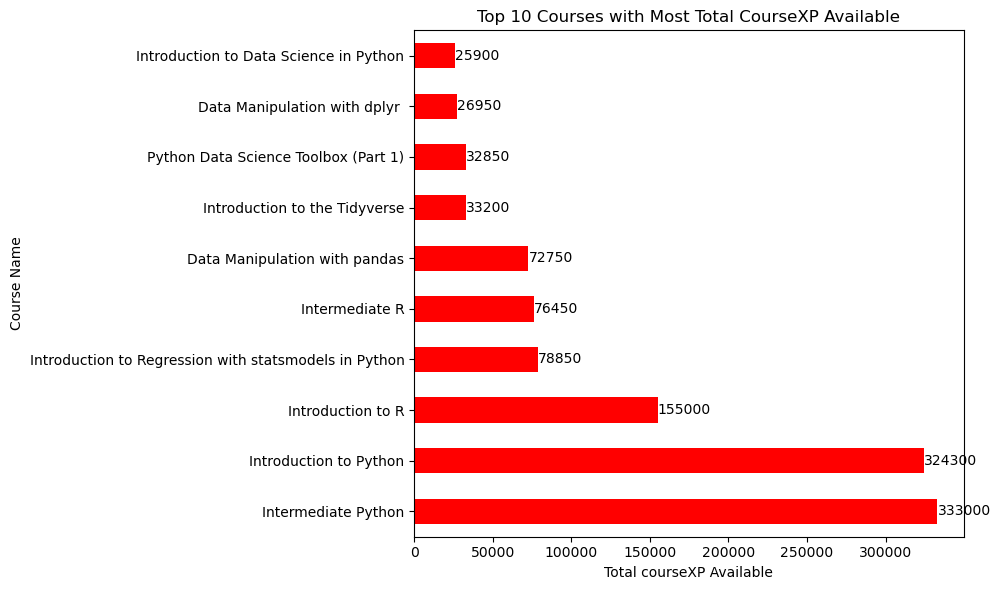

In [17]:

# Filter out rows with missing values in 'TotalExercisesAvailable'
filtered_df = df.copy().dropna(subset=['TotalExercisesAvailable'])

# Convert 'TotalExercisesAvailable' to numeric, replacing non-numeric values with NaN
filtered_df['TotalExercisesAvailable'] = pd.to_numeric(filtered_df['TotalExercisesAvailable'], errors='coerce')

# Calculate the sum of 'TotalExercisesAvailable' for each 'CourseName'
top_courses = filtered_df.groupby('CourseName')['TotalExercisesAvailable'].sum().nlargest(10)

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
top_courses.plot(kind='barh', color='red')
plt.xlabel("Total Exercises Available")
plt.ylabel("Course Name")
plt.title("Top 10 Courses with Most Total Exercises Available")

# Annotate the counts at the right edge of the bars
for index, value in enumerate(top_courses):
    plt.text(value, index, str(int(value)), ha='left', va='center', color='black')

plt.tight_layout()
plt.show()


filtered_df = df.copy()


# Calculate the sum of 'TotalCourseXPAvailable' for each 'CourseName'
top_courses = filtered_df.groupby('CourseName')['TotalCourseXPAvailable'].sum().nlargest(10)

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
top_courses.plot(kind='barh', color='red')
plt.xlabel("Total courseXP Available")
plt.ylabel("Course Name")
plt.title("Top 10 Courses with Most Total CourseXP Available")

# Annotate the counts at the right edge of the bars
for index, value in enumerate(top_courses):
    plt.text(value, index, str(int(value)), ha='left', va='center', color='black')

plt.tight_layout()
plt.show()


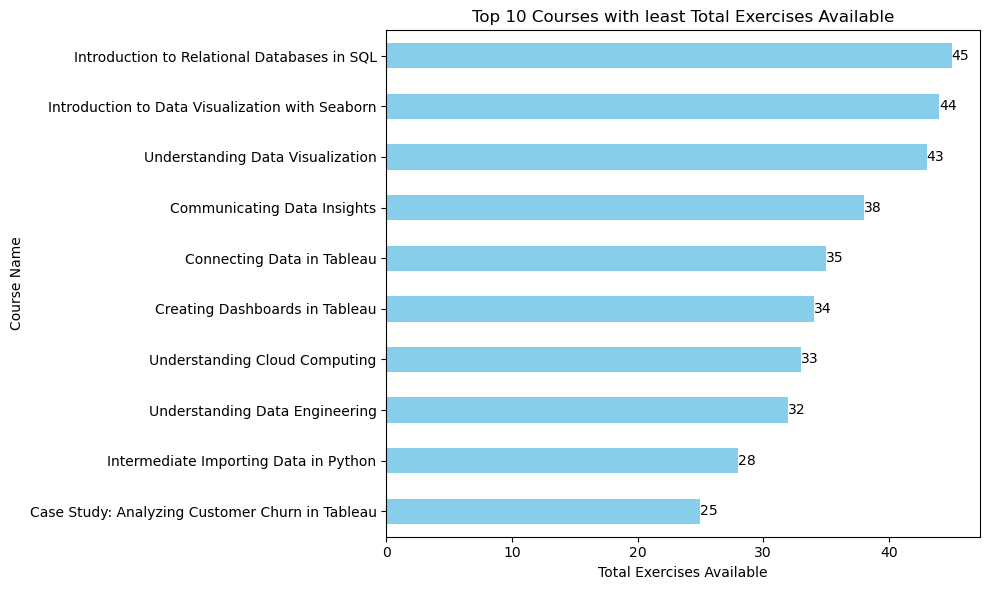

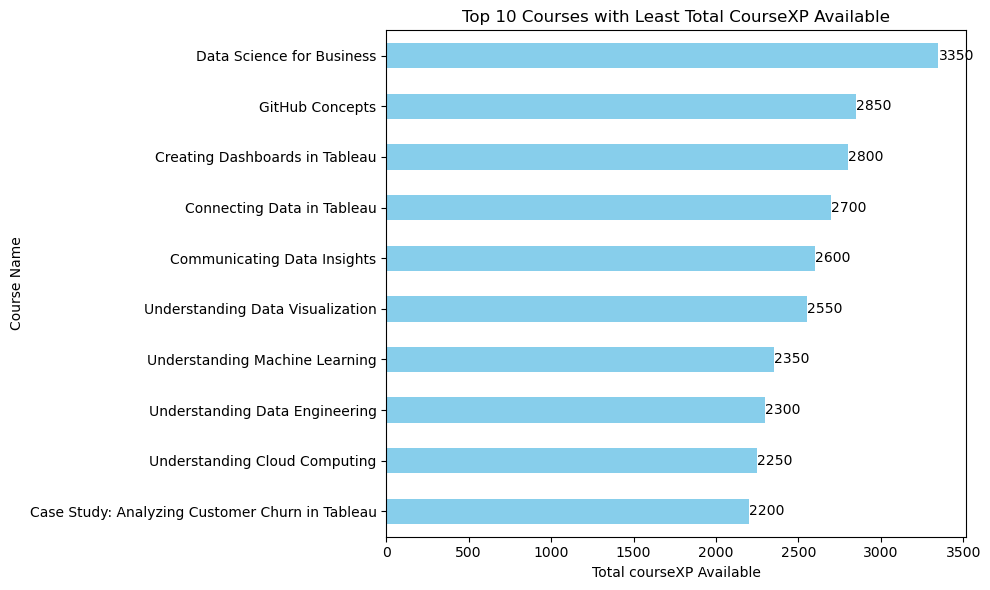

In [18]:
# Filter out rows with missing values in 'TotalExercisesAvailable'
filtered_df = df.copy().dropna(subset=['TotalExercisesAvailable'])

# Convert 'TotalExercisesAvailable' to numeric, replacing non-numeric values with NaN
filtered_df['TotalExercisesAvailable'] = pd.to_numeric(filtered_df['TotalExercisesAvailable'], errors='coerce')

# Calculate the sum of 'TotalExercisesAvailable' for each 'CourseName'
top_courses = filtered_df.groupby('CourseName')['TotalExercisesAvailable'].sum().nsmallest(10)

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
top_courses.plot(kind='barh', color='skyblue')
plt.xlabel("Total Exercises Available")
plt.ylabel("Course Name")
plt.title("Top 10 Courses with least Total Exercises Available")

# Annotate the counts at the right edge of the bars
for index, value in enumerate(top_courses):
    plt.text(value, index, str(int(value)), ha='left', va='center', color='black')

plt.tight_layout()
plt.show()

filtered_df = df.copy()


# Calculate the sum of 'TotalCourseXPAvailable' for each 'CourseName'
top_courses = filtered_df.groupby('CourseName')['TotalCourseXPAvailable'].sum().nsmallest(10)

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
top_courses.plot(kind='barh', color='skyblue')
plt.xlabel("Total courseXP Available")
plt.ylabel("Course Name")
plt.title("Top 10 Courses with Least Total CourseXP Available")

# Annotate the counts at the right edge of the bars
for index, value in enumerate(top_courses):
    plt.text(value, index, str(int(value)), ha='left', va='center', color='black')

plt.tight_layout()
plt.show()

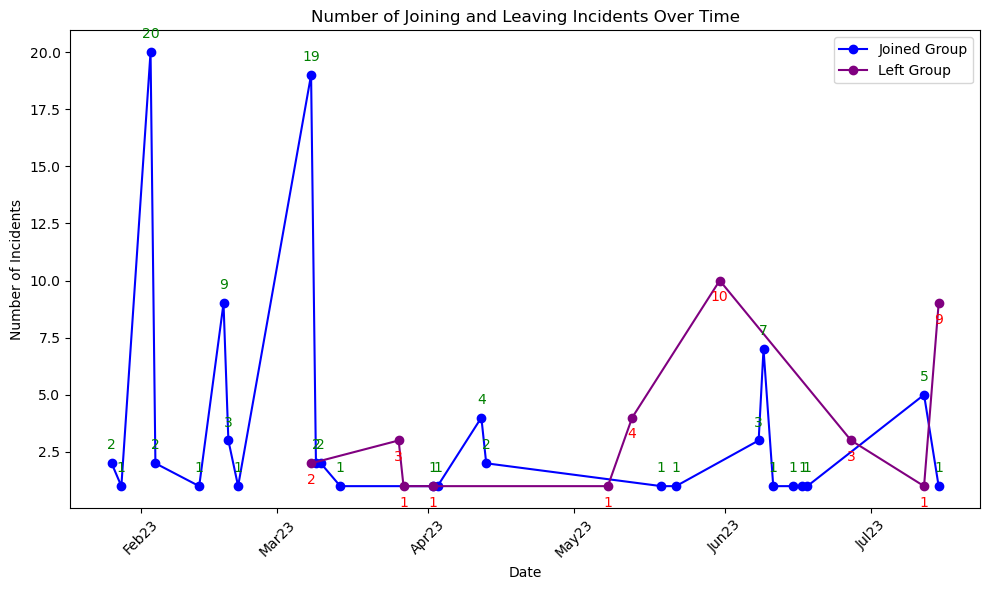

In [32]:
import matplotlib.dates as mdates


# Group by the unique dates and count the number of occurrences for JoinedGroup
joined_grouped = df.groupby(df['JoinedGroup'].dt.date)['Username'].nunique()

# Group by the unique dates and count the number of occurrences for LeftGroup
left_grouped = df.groupby(df['LeftGroup'].dt.date)['Username'].nunique()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(joined_grouped.index, joined_grouped.values, marker='o', color='blue', label='Joined Group')
plt.plot(left_grouped.index, left_grouped.values, marker='o', color='purple', label='Left Group')
plt.title('Number of Joining and Leaving Incidents Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.legend()  # Add legend to distinguish between lines
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b%y'))
plt.tight_layout()

# Display the count near each point for JoinedGroup
for i, count in enumerate(joined_grouped.values):
    plt.annotate(f"{count}", (joined_grouped.index[i], count), textcoords="offset points", xytext=(0,10), ha='center',color = 'green')

# Display the count near each point for LeftGroup
for i, count in enumerate(left_grouped.values):
    plt.annotate(f"{count}", (left_grouped.index[i], count), textcoords="offset points", xytext=(0,-15), ha='center',color = 'red')

plt.show()


            Username  CourseName   XPScore
0          26egqk4sd           1  0.540000
1    AbdulAbidTanbir           1  0.960000
2       FarhanIshrak           1  1.000000
3    JunayedMohammed           4  0.925000
4      OrpitaRaniDas           8  0.565000
..               ...         ...       ...
62  tanzilatasneem00           3  0.996667
63        taufiq1by1           5  0.998000
64            thejoy           3  1.000000
65   towhidulalam645           9  0.973333
66      wshaheenstat           1  0.990000

[67 rows x 3 columns]
                 Username  CourseName   XPScore
53            shefayet125          15  0.744667
65        towhidulalam645           9  0.973333
40            rakibnsajib           8  0.951250
4           OrpitaRaniDas           8  0.565000
14      biazidbostamekuet           5  0.998000
63             taufiq1by1           5  0.998000
61  tanvirulhoquetoufiqbd           5  0.984000
51        shakifrahman019           4  1.000000
26          mdabuomayed44    

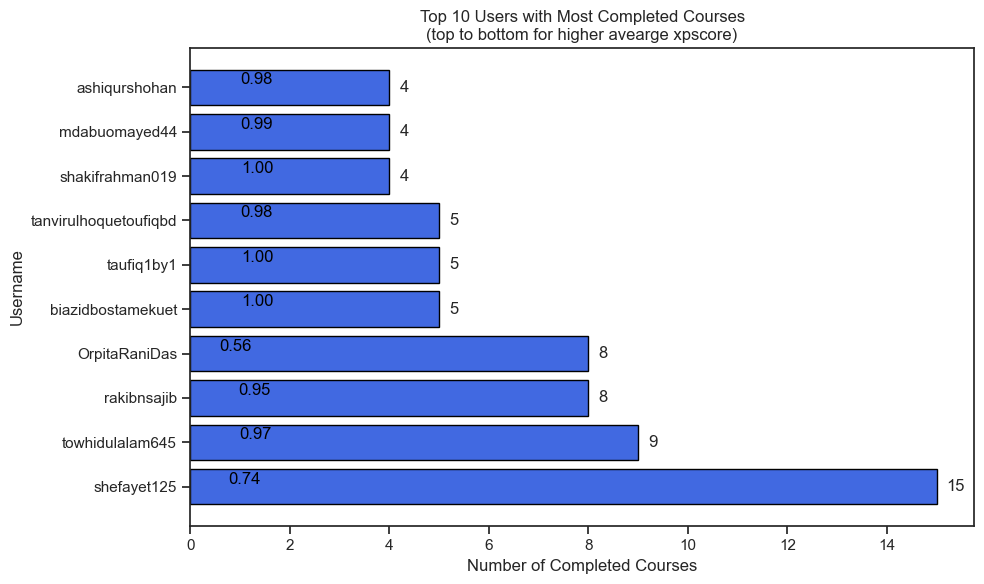

In [65]:


# Filter only completed courses
completed_courses = df[df['CourseStatus'] == 'Completed']

# Group by 'Username', count completed courses, and sum XPScore
user_summary = completed_courses.groupby('Username').agg({'CourseName': 'count', 'XPScore': 'mean'}).reset_index()
print(user_summary)
# Sort by the number of completed courses and get top 10
top_users = user_summary.sort_values(by=['CourseName', 'XPScore'], ascending=False).head(10)

print(top_users)
# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_users['Username'], top_users['CourseName'], color='royalblue', edgecolor='black')
plt.xlabel('Number of Completed Courses')
plt.ylabel('Username')
plt.title('Top 10 Users with Most Completed Courses\n(top to bottom for higher avearge xpscore)')
plt.tight_layout()

# Display the count near the edge of each bar
for i, count in enumerate(top_users['CourseName']):
    plt.text(count + 0.2, i, str(count), va='center')
# Display the total XPScore near the edge of each 'Total XPScore' bar
for i, score in enumerate(top_users['XPScore']):
    plt.text(score + 0.02, i, f"{score:.2f}", va='bottom', color='black')
plt.show()


In [66]:
df.columns


Index(['FirstName', 'LastName', 'Username', 'Teams', 'JoinedGroup',
       'LeftGroup', 'CourseId', 'CourseName', 'Technology', 'StartedCourse',
       'FinishedCourse', 'LastVisitedCourse', 'CompletedCourseExercises',
       'CourseCompletionRate', 'CourseStatus', 'TotalCourseXPAvailable',
       'XPScore', 'FullName', 'CompletedInDays', 'TotalExercisesAvailable'],
      dtype='object')

## A lovely user defined function to show your performance! 
## visualize_course_completion() !

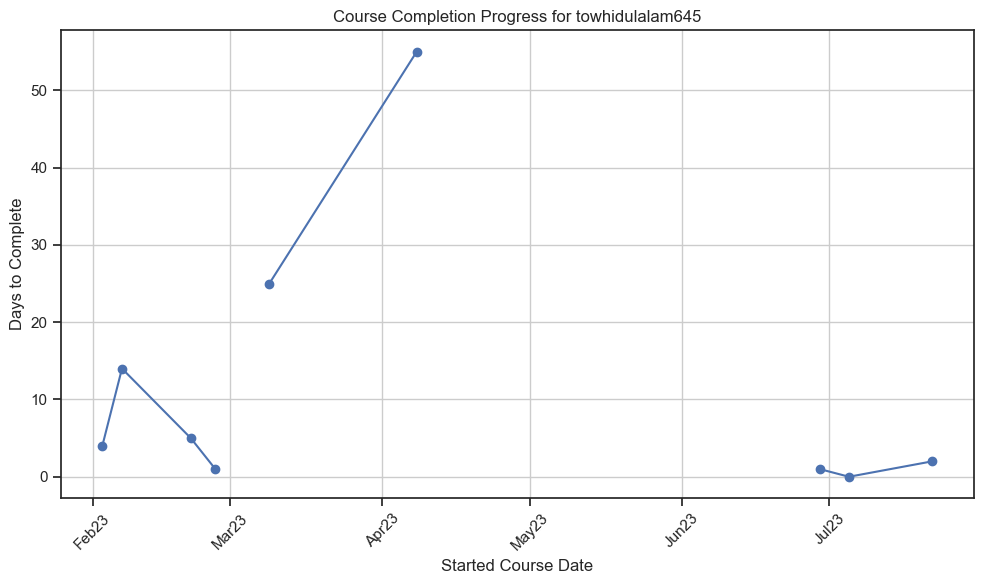

,Username,CourseName,CourseStatus,StartedCourse,FinishedCourse,CompletedInDays
365,towhidulalam645,Introduction to Python,Completed,2023-02-03,2023-02-07,4.0
364,towhidulalam645,Intermediate Python,Completed,2023-02-07,2023-02-21,14.0
363,towhidulalam645,Python Data Science Toolbox (Part 1),Completed,2023-02-21,2023-02-26,5.0
357,towhidulalam645,Python Data Science Toolbox (Part 2),Completed,2023-02-26,2023-02-27,1.0
354,towhidulalam645,Writing Efficient Python Code,In Progress,2023-03-07,NaT,NaN
360,towhidulalam645,Introduction to NumPy,Completed,2023-03-09,2023-04-03,25.0
356,towhidulalam645,Data Manipulation with pandas,Completed,2023-04-08,2023-06-02,55.0
359,towhidulalam645,Introduction to Regression with statsmodels in...,In Progress,2023-04-26,NaT,NaN
361,towhidulalam645,Introduction to Data Visualization with Seaborn,In Progress,2023-06-02,NaT,NaN
353,towhidulalam645,Introduction to Statistics in Python,In Progress,2023-06-08,NaT,NaN


In [90]:
import matplotlib.dates as mdates

def visualize_course_completion(username):
    # Filter data for the given username
    user_data = df[df['Username'] == username].sort_values(by='StartedCourse')

    # Create a line plot to show course completion over time
    plt.figure(figsize=(10, 6))
    
    # Plot each course's completion time
    plt.plot(user_data['StartedCourse'].dt.date, user_data['CompletedInDays'], marker='o')

    plt.xlabel('Started Course Date')
    plt.ylabel('Days to Complete')
    plt.title(f'Course Completion Progress for {username}')
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b%y'))
    plt.tight_layout()
    plt.grid(True)
    plt.show()
    # Display additional information in a table
    a = user_data[['Username', 'CourseName', 'CourseStatus', 'StartedCourse','FinishedCourse','CompletedInDays']]
    display(a)
# Call the function with the desired username
visualize_course_completion('towhidulalam645')



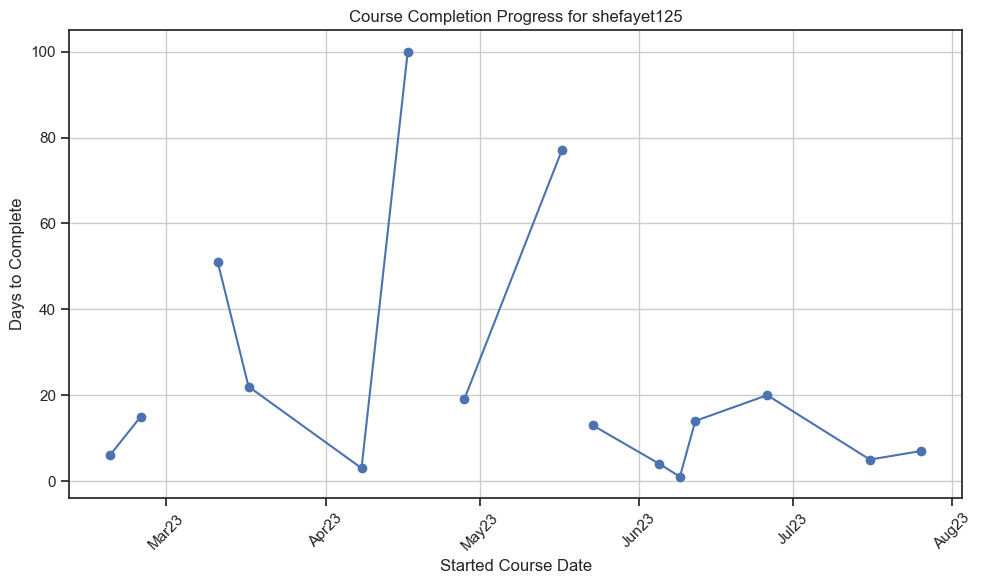

,Username,CourseName,CourseStatus,StartedCourse,FinishedCourse,CompletedInDays
303,shefayet125,Introduction to Python,Completed,2023-02-18,2023-02-24,6.0
296,shefayet125,Intermediate Python,Completed,2023-02-24,2023-03-11,15.0
310,shefayet125,Introduction to Version Control with Git,In Progress,2023-03-06,NaT,NaN
305,shefayet125,Data Analysis in Excel,In Progress,2023-03-06,NaT,NaN
308,shefayet125,Data Manipulation with pandas,Completed,2023-03-11,2023-05-01,51.0
300,shefayet125,Python Data Science Toolbox (Part 1),Completed,2023-03-17,2023-04-08,22.0
301,shefayet125,Python Data Science Toolbox (Part 2),Completed,2023-04-08,2023-04-11,3.0
292,shefayet125,Introduction to Importing Data in Python,Completed,2023-04-17,2023-07-26,100.0
293,shefayet125,Introduction to Regression with statsmodels in...,In Progress,2023-04-26,NaT,NaN
291,shefayet125,Joining Data with pandas,Completed,2023-04-28,2023-05-17,19.0


In [91]:
visualize_course_completion('shefayet125')

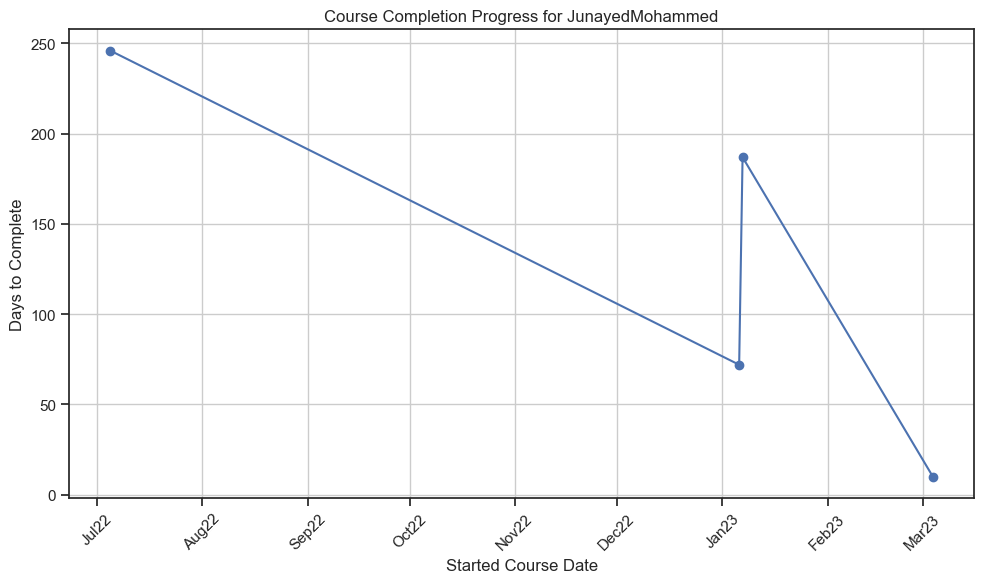

,Username,CourseName,CourseStatus,StartedCourse,FinishedCourse,CompletedInDays
104,JunayedMohammed,Introduction to R,Completed,2022-07-05,2023-03-08,246.0
105,JunayedMohammed,Intermediate Python,Completed,2023-01-06,2023-03-19,72.0
106,JunayedMohammed,Python Data Science Toolbox (Part 1),Completed,2023-01-07,2023-07-13,187.0
102,JunayedMohammed,Introduction to Statistics,Completed,2023-03-04,2023-03-14,10.0
101,JunayedMohammed,Intermediate R,In Progress,2023-03-09,NaT,NaN
107,JunayedMohammed,Python Data Science Toolbox (Part 2),In Progress,2023-07-13,NaT,NaN
103,JunayedMohammed,Data Manipulation with pandas,In Progress,2023-07-14,NaT,NaN


In [203]:
visualize_course_completion('JunayedMohammed')

In [92]:
# Sort courses based on total XP available in descending order
sorted_courses = df.copy().sort_values(by='TotalCourseXPAvailable', ascending=False)

# Reset index to start from 1 for ranking
sorted_courses.reset_index(drop=True, inplace=True)
sorted_courses.index += 1

# Display the ranked courses
print(sorted_courses[['CourseName', 'TotalCourseXPAvailable']])

              CourseName  TotalCourseXPAvailable
1    Intermediate Python                    7400
2    Intermediate Python                    7400
3    Intermediate Python                    7400
4    Intermediate Python                    7400
5    Intermediate Python                    7400
..                   ...                     ...
366  Introduction to SQL                    1650
367  Introduction to SQL                    1650
368  Introduction to SQL                    1650
369  Introduction to SQL                    1650
370  Introduction to SQL                    1650

[370 rows x 2 columns]


In [96]:
df['TotalCourseXPAvailable'].describe()

count     370.000000
mean     4628.783784
std      1486.284132
min      1650.000000
25%      3850.000000
50%      4325.000000
75%      4850.000000
max      7400.000000
Name: TotalCourseXPAvailable, dtype: float64

In [97]:
# Is there a possiblity to categorize the courses as difficult,medium,easy?

In [99]:


def categorize_course_difficulty(course_name, xp):
    if 'Introduction' in course_name:
        return 'Easy'
    elif xp <= df['TotalCourseXPAvailable'].describe(percentiles=[0.67])['67%']:
        return 'Medium'
    else:
        return 'Difficult'

# Apply the categorization function to create a new 'Difficulty' column
df['Difficulty'] = df.apply(lambda row: categorize_course_difficulty(row['CourseName'], row['TotalCourseXPAvailable']), axis=1)

# Display the courses with their corresponding difficulty levels
print(df[['CourseName', 'TotalCourseXPAvailable', 'Difficulty']])


                                 CourseName  TotalCourseXPAvailable Difficulty
0                        Cleaning Data in R                    3700     Medium
1           Introduction to Statistics in R                    4250       Easy
2               Data Communication Concepts                    3750     Medium
3                         Introduction to R                    6200       Easy
4                    Introduction to Python                    4700       Easy
..                                      ...                     ...        ...
365                  Introduction to Python                    4700       Easy
366  Introduction to Data Science in Python                    3700       Easy
367                  Introduction to Python                    4700       Easy
368                  Introduction to Python                    4700       Easy
369                  Introduction to Python                    4700       Easy

[370 rows x 3 columns]


In [102]:
df[df['Difficulty']=='Difficult'][['CourseName','Difficulty']].value_counts()

CourseName                                               Difficulty
Intermediate Python                                      Difficult     45
Data Manipulation with pandas                            Difficult     15
Intermediate R                                           Difficult     11
Analyzing Data in Tableau                                Difficult      1
Case Studies: Building Web Applications with Shiny in R  Difficult      1
String Manipulation with stringr in R                    Difficult      1
Supervised Learning in R: Regression                     Difficult      1
dtype: int64

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   FirstName                 365 non-null    object        
 1   LastName                  365 non-null    object        
 2   Username                  370 non-null    object        
 3   Teams                     259 non-null    object        
 4   JoinedGroup               370 non-null    datetime64[ns]
 5   LeftGroup                 104 non-null    datetime64[ns]
 6   CourseId                  370 non-null    int64         
 7   CourseName                370 non-null    object        
 8   Technology                370 non-null    object        
 9   StartedCourse             370 non-null    datetime64[ns]
 10  FinishedCourse            166 non-null    datetime64[ns]
 11  LastVisitedCourse         370 non-null    datetime64[ns]
 12  CompletedCourseExercis

With newly added columns ,we can enrich our performance function as follows

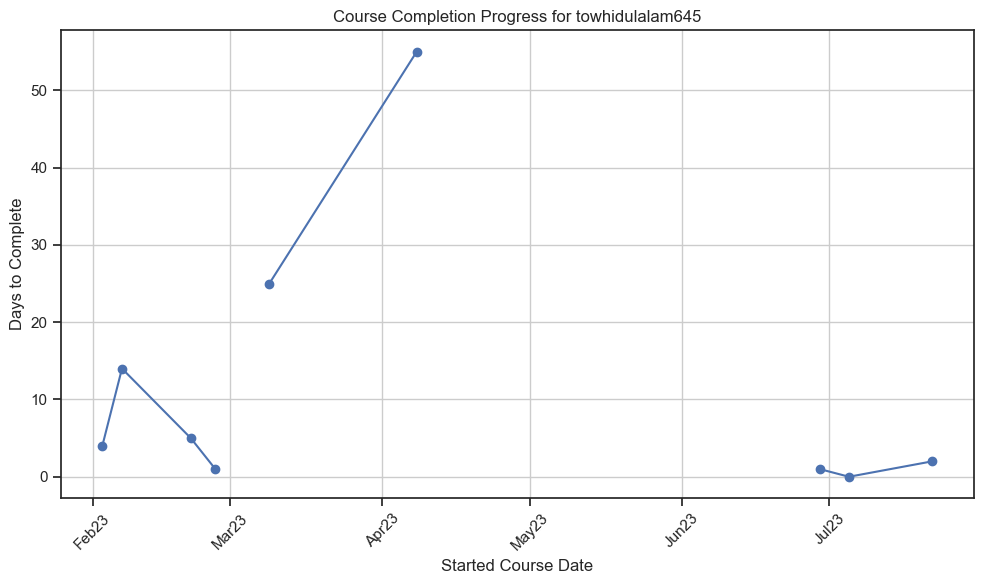

,Username,CourseName,Difficulty,CourseStatus,StartedCourse,FinishedCourse,CompletedInDays
365,towhidulalam645,Introduction to Python,Easy,Completed,2023-02-03,2023-02-07,4.0
364,towhidulalam645,Intermediate Python,Difficult,Completed,2023-02-07,2023-02-21,14.0
363,towhidulalam645,Python Data Science Toolbox (Part 1),Medium,Completed,2023-02-21,2023-02-26,5.0
357,towhidulalam645,Python Data Science Toolbox (Part 2),Medium,Completed,2023-02-26,2023-02-27,1.0
354,towhidulalam645,Writing Efficient Python Code,Medium,In Progress,2023-03-07,NaT,NaN
360,towhidulalam645,Introduction to NumPy,Easy,Completed,2023-03-09,2023-04-03,25.0
356,towhidulalam645,Data Manipulation with pandas,Difficult,Completed,2023-04-08,2023-06-02,55.0
359,towhidulalam645,Introduction to Regression with statsmodels in...,Easy,In Progress,2023-04-26,NaT,NaN
361,towhidulalam645,Introduction to Data Visualization with Seaborn,Easy,In Progress,2023-06-02,NaT,NaN
353,towhidulalam645,Introduction to Statistics in Python,Easy,In Progress,2023-06-08,NaT,NaN


In [204]:
import matplotlib.dates as mdates

def visualize_course_completion(username):
    # Filter data for the given username
    user_data = df[df['Username'] == username].sort_values(by='StartedCourse')

    # Create a line plot to show course completion over time
    plt.figure(figsize=(10, 6))
    
    # Plot each course's completion time
    plt.plot(user_data['StartedCourse'].dt.date, user_data['CompletedInDays'], marker='o')

    plt.xlabel('Started Course Date')
    plt.ylabel('Days to Complete')
    plt.title(f'Course Completion Progress for {username}')
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b%y'))
    plt.tight_layout()
    plt.grid(True)
    plt.show()
    # Display additional information in a table
    a = user_data[['Username', 'CourseName','Difficulty', 'CourseStatus', 'StartedCourse','FinishedCourse','CompletedInDays']]
    display(a)
# Call the function with the desired username
visualize_course_completion('towhidulalam645')


## Problem:

Difficulty Score for completing easy,medium and difficult course is 1,1.5.2.0 respectively and for courses in progress the difficulty score is 0 irrespective of difficulty level of the course.

You have to create a new dataframe,containing the ranking for each user.The ranking will simply be based on the composite score which is calculated by (A*B)-C

A means sum of difficulty scores for a user and B = (average 'XPScore' for the completed courses by the user)+(Sum of 'XPScore' for courses in progress for the user) and C=total number of days to complete the courses/(30*number of courses completed )

***Credit: my brain,ideas,DataCamp Teachers,friends,ChatGPT and above all Allah Almighty has granted everything.***

To err is human.